In [1]:
# Statsmodels time series analysis

In [2]:
# Statsmodels, Dates and datetime

In [3]:
# !pip install statsmodels

In [4]:
import statsmodels.api as sm

In [5]:
sm.tsa.datetools.dates_from_range('2010', length=12)

[datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 12, 31, 0, 0),
 datetime.datetime(2013, 12, 31, 0, 0),
 datetime.datetime(2014, 12, 31, 0, 0),
 datetime.datetime(2015, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2017, 12, 31, 0, 0),
 datetime.datetime(2018, 12, 31, 0, 0),
 datetime.datetime(2019, 12, 31, 0, 0),
 datetime.datetime(2020, 12, 31, 0, 0),
 datetime.datetime(2021, 12, 31, 0, 0)]

In [6]:
sm.tsa.datetools.dates_from_range('2010m1', length=120)

[datetime.datetime(2010, 1, 31, 0, 0),
 datetime.datetime(2010, 2, 28, 0, 0),
 datetime.datetime(2010, 3, 31, 0, 0),
 datetime.datetime(2010, 4, 30, 0, 0),
 datetime.datetime(2010, 5, 31, 0, 0),
 datetime.datetime(2010, 6, 30, 0, 0),
 datetime.datetime(2010, 7, 31, 0, 0),
 datetime.datetime(2010, 8, 31, 0, 0),
 datetime.datetime(2010, 9, 30, 0, 0),
 datetime.datetime(2010, 10, 31, 0, 0),
 datetime.datetime(2010, 11, 30, 0, 0),
 datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 1, 31, 0, 0),
 datetime.datetime(2011, 2, 28, 0, 0),
 datetime.datetime(2011, 3, 31, 0, 0),
 datetime.datetime(2011, 4, 30, 0, 0),
 datetime.datetime(2011, 5, 31, 0, 0),
 datetime.datetime(2011, 6, 30, 0, 0),
 datetime.datetime(2011, 7, 31, 0, 0),
 datetime.datetime(2011, 8, 31, 0, 0),
 datetime.datetime(2011, 9, 30, 0, 0),
 datetime.datetime(2011, 10, 31, 0, 0),
 datetime.datetime(2011, 11, 30, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 1, 31, 0, 0),
 datetime.datetime(

In [7]:
# Q-Q plots

In [8]:
from statsmodels.graphics.api import qqplot
import numpy as np

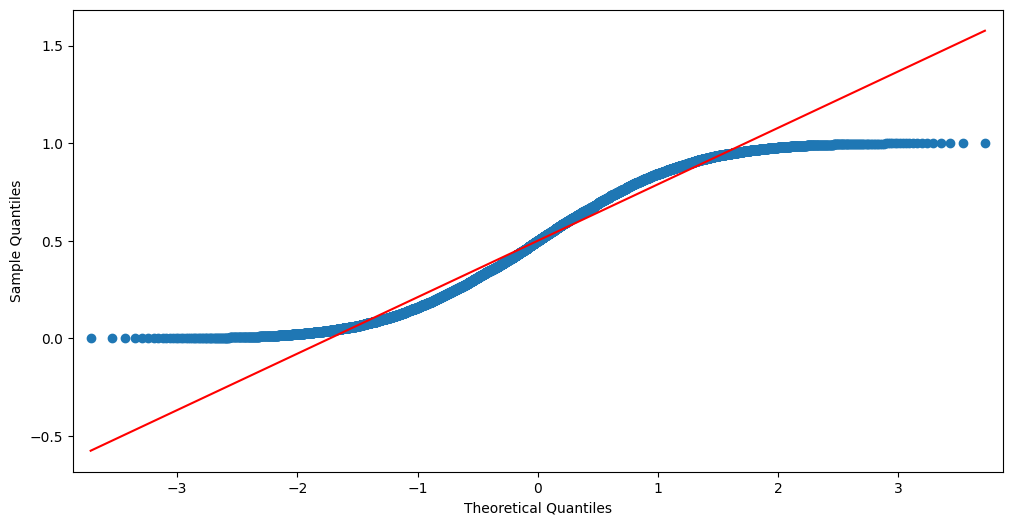

In [9]:
fig = qqplot(np.random.uniform(size=10000), line='s')
fig.set_size_inches(12, 6)

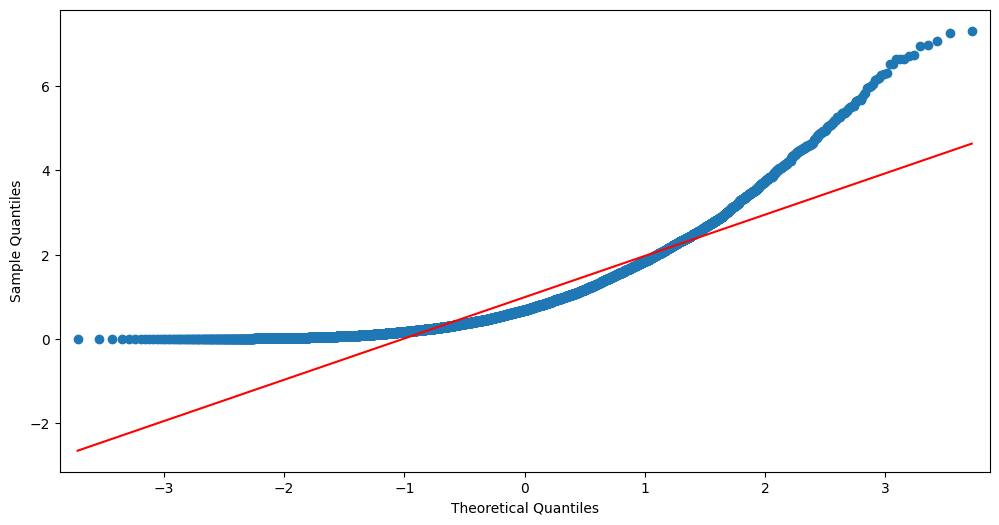

In [10]:
fig = qqplot(np.random.exponential(size=10000), line='s')
fig.set_size_inches(12, 6)

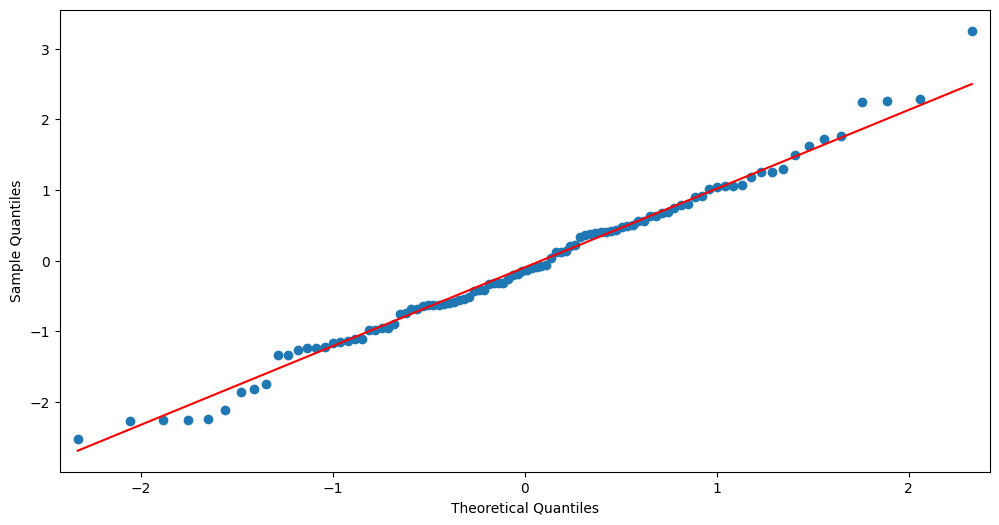

In [11]:
fig = qqplot(np.random.normal(size=100), line='s')
fig.set_size_inches(12, 6)

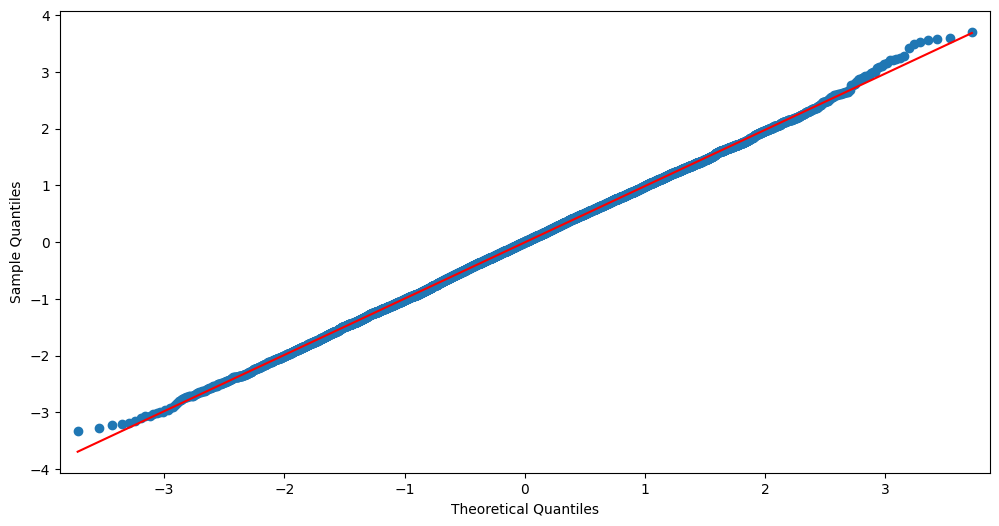

In [12]:
fig = qqplot(np.random.normal(size=10000), line='s')
fig.set_size_inches(12, 6)

In [13]:
# Trends and Cycles

In [14]:
import pandas as pd
n_obs = 12 * 20
linear_trend = np.linspace(100, 200, num=n_obs)
cycle = np.sin(linear_trend) * 10
error_noise = np.random.randn(n_obs)
dataset = pd.DataFrame(linear_trend + cycle + error_noise,
                       index=sm.tsa.datetools.dates_from_range('2000m1', length=n_obs),
                      columns=['Price'])
dataset

,Price
2000-01-31,93.936043
2000-02-29,98.858692
2000-03-31,103.985303
2000-04-30,108.362143
2000-05-31,110.570020
...,...
2019-08-31,194.897651
2019-09-30,191.501028
2019-10-31,189.522968
2019-11-30,188.547245


<Axes: >

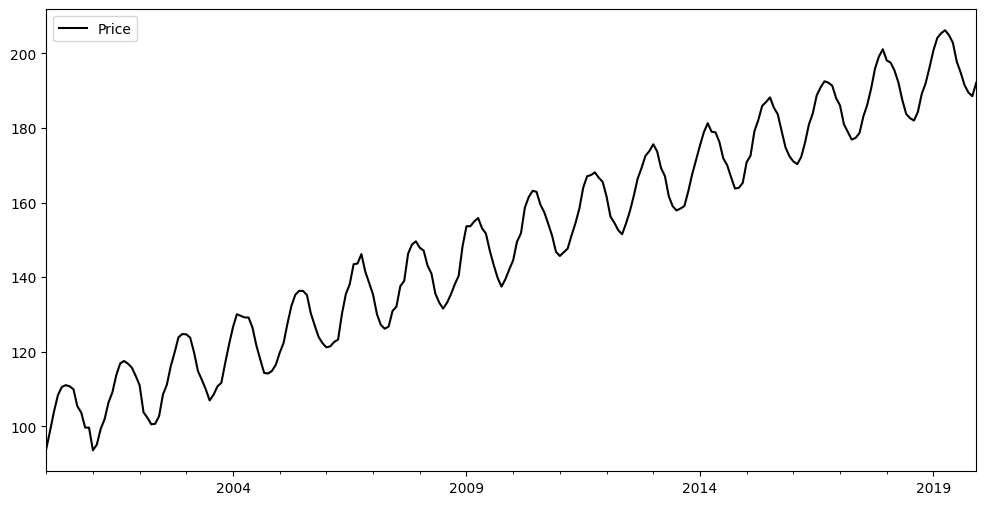

In [15]:
import matplotlib.pyplot as plt
dataset.plot(figsize=(12, 6), color='black')

In [16]:
hp_cycle, hp_trend = sm.tsa.filters.hpfilter(dataset['Price'], lamb=129600)
decomp = dataset[['Price']]
decomp['HP_Cycle'] = hp_cycle
decomp['HP_Trend'] = hp_trend
decomp

,Price,HP_Cycle,HP_Trend
2000-01-31,93.936043,-7.190193,101.126236
2000-02-29,98.858692,-2.644128,101.502820
2000-03-31,103.985303,2.105955,101.879348
2000-04-30,108.362143,6.106398,102.255745
2000-05-31,110.570020,7.938069,102.631951
...,...,...,...
2019-08-31,194.897651,-2.256852,197.154503
2019-09-30,191.501028,-6.022696,197.523725
2019-10-31,189.522968,-8.369613,197.892581
2019-11-30,188.547245,-9.714018,198.261263


In [17]:
uc = sm.tsa.UnobservedComponents(dataset['Price'], level='lltrend', cycle=True, stochastic_cycle=True)
res_uc = uc.fit(method='powell', disp=True)
res_uc.summary()

Optimization terminated successfully.
         Current function value: 1.911037
         Iterations: 6
         Function evaluations: 445


/home/hung/.local/share/virtualenvs/artificial-intelligence-Sl7vqf1g/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:             local linear trend   Log Likelihood                -458.649
                   + stochastic cycle   AIC                            927.298
Date:                Sun, 19 Jan 2025   BIC                            944.617
Time:                        16:38:20   HQIC                           934.279
Sample:                    01-31-2000                                         
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.2050      0.153      1.337      0.181      -0.096       0.506
sigma2.level      1.104e-16      0.086   1.28e-15      1.000      -0.169       0.169
sigma2.trend      3.303e-22   2.05e-05   1.61e-17      1.000   -4.02e-05    4.02e-05
sigma2.cycle         1.5583      0.405      3.850      0.000       0.765       2.352
frequency.cycle      0.3491      0.011     31.267      0.000       0.327       0.371
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.62   Prob(JB):                         0.83
Heteroskedasticity (H):               0.65   Skew:                            -0.01
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
decomp['UC_Cycle'] = res_uc.cycle.smoothed
decomp['UC_Trend'] = res_uc.level.smoothed
decomp['UC_Error'] = res_uc.resid
decomp

,Price,HP_Cycle,HP_Trend,UC_Cycle,UC_Trend,UC_Error
2000-01-31,93.936043,-7.190193,101.126236,-5.708763,99.737875,93.936043
2000-02-29,98.858692,-2.644128,101.502820,-1.264835,100.157192,7.755176
2000-03-31,103.985303,2.105955,101.879348,3.406620,100.576510,5.601473
2000-04-30,108.362143,6.106398,102.255745,7.280773,100.995827,-1.971244
2000-05-31,110.570020,7.938069,102.631951,9.138097,101.415145,-0.594747
...,...,...,...,...,...,...
2019-08-31,194.897651,-2.256852,197.154503,-3.461201,198.277492,0.003147
2019-09-30,191.501028,-6.022696,197.523725,-7.172928,198.696810,-0.662274
2019-10-31,189.522968,-8.369613,197.892581,-9.615190,199.116127,0.039055
2019-11-30,188.547245,-9.714018,198.261263,-10.709457,199.535445,-0.056915


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dc = seasonal_decompose(dataset['Price'], model='additive')
decomp['SDC_Cycle'] = s_dc.seasonal
decomp['SDC_Trend'] = s_dc.trend
decomp['SDC_Error'] = s_dc.resid
decomp[118:122]

,Price,HP_Cycle,HP_Trend,UC_Cycle,UC_Trend,UC_Error,SDC_Cycle,SDC_Trend,SDC_Error
2009-11-30,139.466679,-9.827058,149.293736,-9.837585,149.217342,2.749044,0.295846,146.902874,-7.732041
2009-12-31,142.108665,-7.610634,149.719298,-7.666235,149.636660,1.676529,0.596306,147.730695,-6.218336
2010-01-31,144.561235,-5.583952,150.145187,-5.356199,150.055977,-0.001502,0.490561,148.867248,-4.796574
2010-02-28,149.579037,-0.992206,150.571243,-1.160025,150.475295,1.769278,-0.163739,150.200041,-0.457265


<Axes: title={'center': 'Trend components'}>

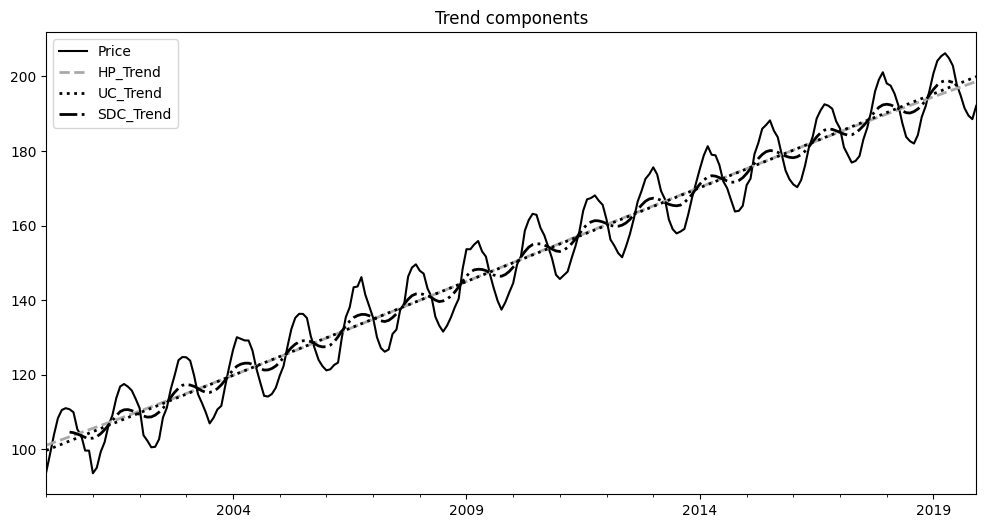

In [20]:
plt.title('Trend components')
decomp['Price'].plot(figsize=(12, 6), color='black', linestyle='-', legend='Price')
decomp['HP_Trend'].plot(figsize=(12, 6), color='darkgray', linestyle='--', lw=2, legend='HP_Trend')
decomp['UC_Trend'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Trend')
decomp['SDC_Trend'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Trend')

<Axes: title={'center': 'Cycle/Seasonal components'}>

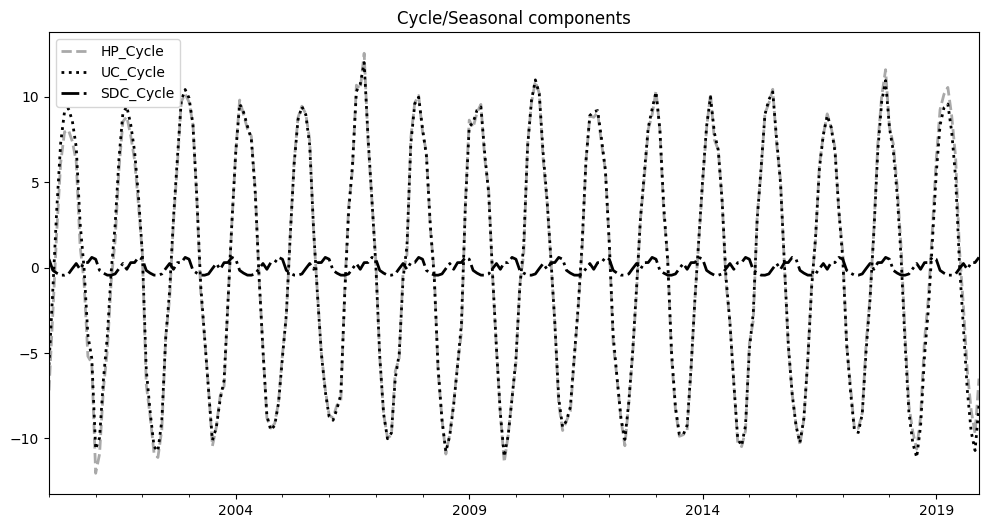

In [21]:
plt.title('Cycle/Seasonal components')
decomp['HP_Cycle'].plot(figsize=(12, 6), color='darkgray', linestyle='--', lw=2, legend='HP_Cycle')
decomp['UC_Cycle'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Cycle')
decomp['SDC_Cycle'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Cycle')

<Axes: title={'center': 'Error components'}>

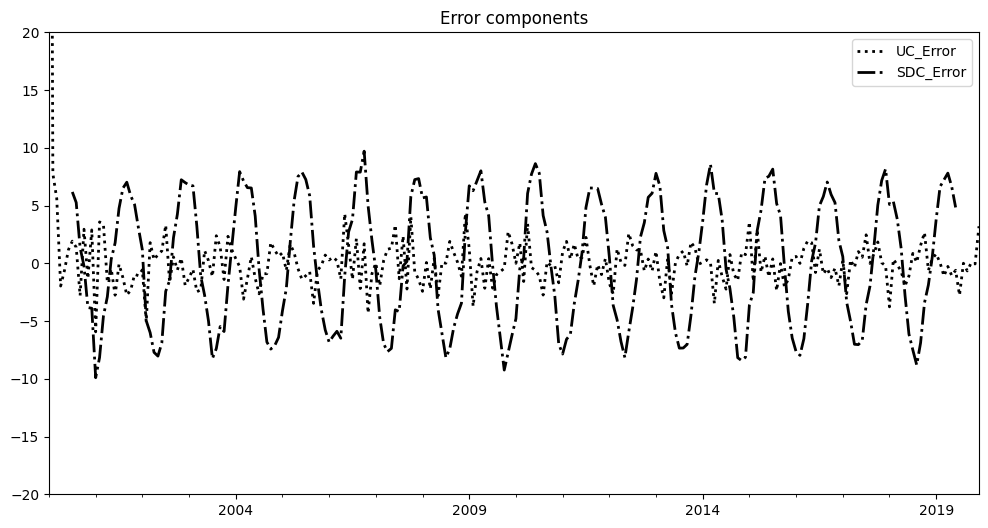

In [22]:
plt.title('Error components')
plt.ylim((-20, 20))
decomp['UC_Error'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Error')
decomp['SDC_Error'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Error')

In [23]:
# Stationarity

In [24]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset['Price'])
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: 0.2852626906325015
p value: 0.9766581522489965
Lags: 15
Num observations: 224


In [25]:
price_diff = (dataset['Price'].shift(-1) - dataset['Price']).fillna(0)
price_diff

2000-01-31    4.922648
2000-02-29    5.126612
2000-03-31    4.376840
2000-04-30    2.207877
2000-05-31    0.490483
                ...   
2019-08-31   -3.396623
2019-09-30   -1.978060
2019-10-31   -0.975723
2019-11-30    3.585747
2019-12-31    0.000000
Name: Price, Length: 240, dtype: float64

In [26]:
result = adfuller(price_diff)
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: -9.371739715923459
p value: 7.346127798444881e-16
Lags: 14
Num observations: 225


In [27]:
# ACF

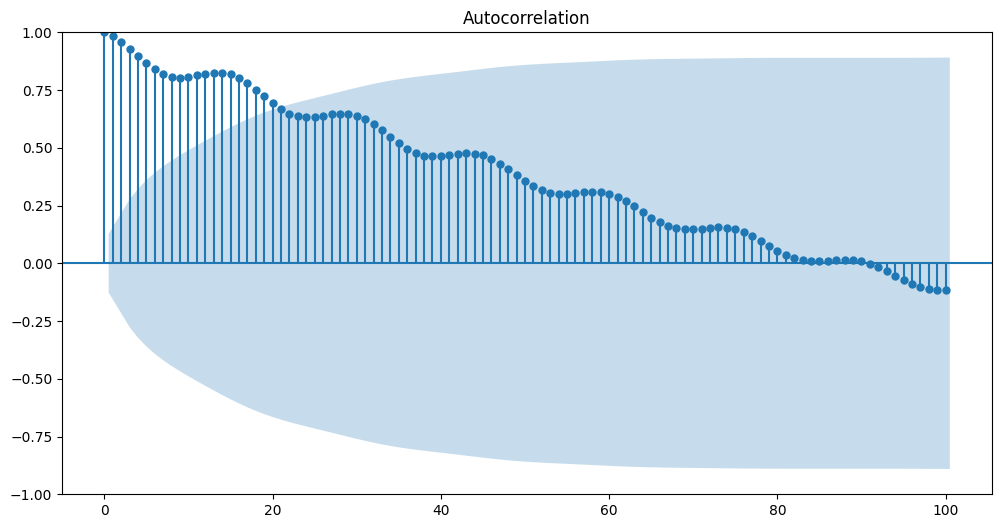

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(dataset['Price'], lags=100)
fig.set_size_inches(12, 6)

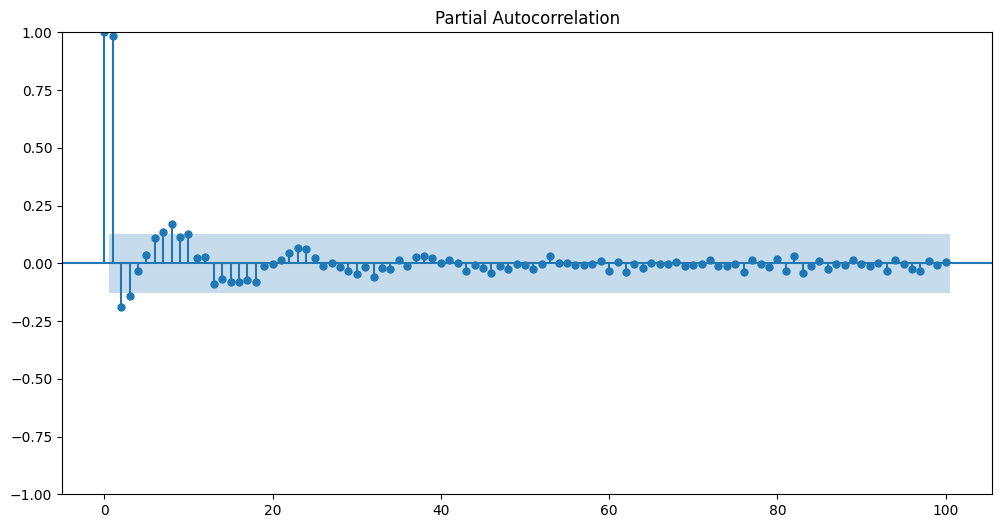

In [29]:
fig = plot_pacf(dataset['Price'], lags=100)
fig.set_size_inches(12, 6)

In [30]:
# ARIMA

In [31]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(dataset['Price'], order=(36,1,2))
res_ar = arima.fit()
res_ar.summary()

/home/hung/.local/share/virtualenvs/artificial-intelligence-Sl7vqf1g/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/hung/.local/share/virtualenvs/artificial-intelligence-Sl7vqf1g/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/hung/.local/share/virtualenvs/artificial-intelligence-Sl7vqf1g/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/hung/.local/share/virtualenvs/artificial-intelligence-Sl7vqf1g/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros a

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:                ARIMA(36, 1, 2)   Log Likelihood                -342.300
Date:                Sun, 19 Jan 2025   AIC                            762.600
Time:                        16:38:30   BIC                            898.182
Sample:                    01-31-2000   HQIC                           817.236
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8342      5.373     -0.155      0.877     -11.365       9.696
ar.L2         -0.7483      3.409     -0.219      0.826      -7.430       5.933
ar.L3         -0.6322      2.647     -0.239      0.811      -5.821       4.557
ar.L4         -0.4048      2.398     -0.169      0.866      -5.104       4.295
ar.L5         -0.2507      1.361     -0.184      0.854      -2.918       2.417
ar.L6         -0.2126      0.790     -0.269      0.788      -1.760       1.335
ar.L7         -0.2576      0.833     -0.309      0.757      -1.890       1.374
ar.L8         -0.2580      1.146     -0.225      0.822      -2.504       1.988
ar.L9         -0.4375      1.078     -0.406      0.685      -2.551       1.676
ar.L10        -0.3001      2.001     -0.150      0.881      -4.221       3.621
ar.L11        -0.3743      1.092     -0.343      0.732      -2.515       1.766
ar.L12        -0.3315      1.542     -0.215      0.830      -3.354       2.691
ar.L13        -0.2232      1.321     -0.169      0.866      -2.812       2.366
ar.L14        -0.0192      0.740     -0.026      0.979      -1.470       1.432
ar.L15        -0.0055      0.274     -0.020      0.984      -0.543       0.532
ar.L16         0.0874      0.136      0.641      0.522      -0.180       0.355
ar.L17         0.1774      0.445      0.398      0.690      -0.695       1.050
ar.L18         0.1795      0.847      0.212      0.832      -1.480       1.839
ar.L19         0.2421      0.720      0.336      0.737      -1.169       1.653
ar.L20         0.2272      1.033      0.220      0.826      -1.797       2.252
ar.L21         0.2052      0.907      0.226      0.821      -1.573       1.984
ar.L22         0.2226      0.785      0.284      0.777      -1.315       1.761
ar.L23         0.2639      0.916      0.288      0.773      -1.531       2.059
ar.L24         0.2583      1.122      0.230      0.818      -1.942       2.458
ar.L25         0.2412      1.048      0.230      0.818      -1.812       2.294
ar.L26         0.3786      0.953      0.397      0.691      -1.490       2.247
ar.L27         0.3782      1.713      0.221      0.825      -2.979       3.735
ar.L28         0.3336      1.569      0.213      0.832      -2.742       3.409
ar.L29         0.4182      1.266      0.330      0.741      -2.064       2.900
ar.L30         0.5681      1.778      0.319      0.749      -2.917       4.053
ar.L31         0.6177      2.520      0.245      0.806      -4.321       5.557
ar.L32         0.5494      2.573      0.214      0.831      -4.493       5.592
ar.L33         0.4478      2.104      0.213      0.831      -3.675       4.571
ar.L34         0.2547      1.649      0.154      0.877      -2.977       3.487
ar.L35         0.1735      0.793      0.219      0.827      -1.382       1.729
ar.L36         0.0322      0.607      0.053      0.958      -1.157       1.221
ma.L1          0.1504      5.351      0.028      0.978     -10.338      10.639
ma.L2          0.1198      0.743      0.161      0.872      -1.337       1.577
si

In [32]:
dataset['PredPrice'] = res_ar.predict(dataset.index[0], dataset.index[-1])
dataset

,Price,PredPrice
2000-01-31,93.936043,0.000000
2000-02-29,98.858692,93.936279
2000-03-31,103.985303,101.229445
2000-04-30,108.362143,107.205571
2000-05-31,110.570020,111.087960
...,...,...
2019-08-31,194.897651,194.748938
2019-09-30,191.501028,191.903873
2019-10-31,189.522968,190.156976
2019-11-30,188.547245,189.578354


<Axes: >

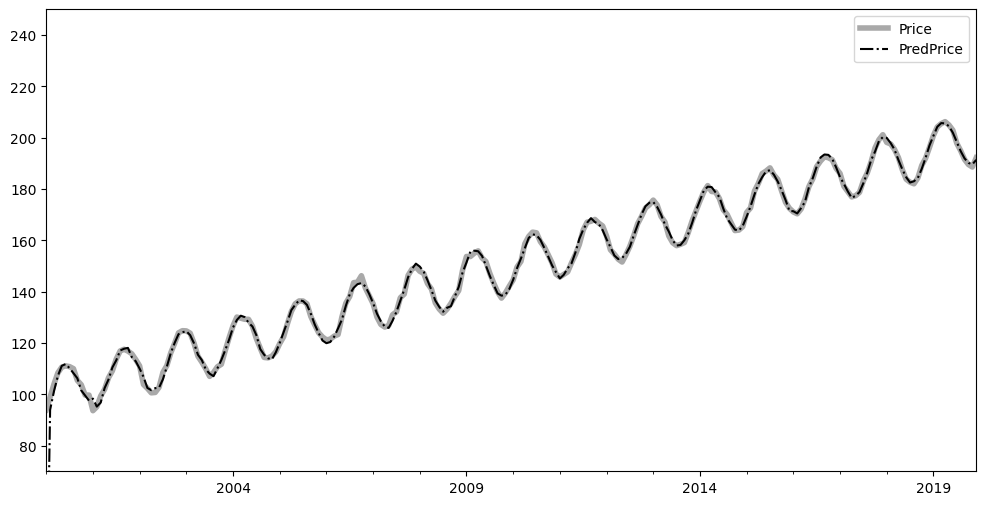

In [33]:
plt.ylim(70, 250)
dataset['Price'].plot(figsize=(12, 6), color='darkgray', linestyle='-', lw=4, legend='Price')
dataset['PredPrice'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

In [34]:
extended_dataset = pd.DataFrame(index=sm.tsa.datetools.dates_from_range('2020m1', length=48))
# extended_dataset = dataset.append(extended_dataset)
extended_dataset = pd.concat([dataset, extended_dataset])
extended_dataset

,Price,PredPrice
2000-01-31,93.936043,0.000000
2000-02-29,98.858692,93.936279
2000-03-31,103.985303,101.229445
2000-04-30,108.362143,107.205571
2000-05-31,110.570020,111.087960
...,...,...
2023-08-31,NaN,NaN
2023-09-30,NaN,NaN
2023-10-31,NaN,NaN
2023-11-30,NaN,NaN


In [35]:
extended_dataset['PredPrice'] = res_ar.predict(extended_dataset.index[0], extended_dataset.index[-1])
extended_dataset

,Price,PredPrice
2000-01-31,93.936043,0.000000
2000-02-29,98.858692,93.936279
2000-03-31,103.985303,101.229445
2000-04-30,108.362143,107.205571
2000-05-31,110.570020,111.087960
...,...,...
2023-08-31,NaN,207.943188
2023-09-30,NaN,209.669458
2023-10-31,NaN,212.751846
2023-11-30,NaN,216.873484


<Axes: >

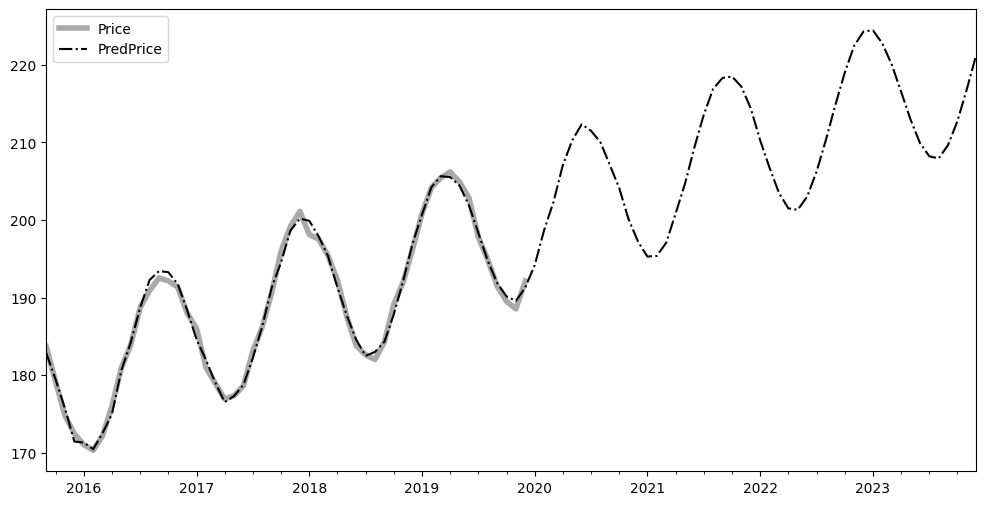

In [36]:
extended_dataset['Price'].iloc[-100:].plot(figsize=(12, 6), color='darkgray', linestyle='-', lw=4, legend='Price')
extended_dataset['PredPrice'].iloc[-100:].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')